# 集中器数据传输用时探索

- Settings
    - 300 connections
    - 2000 log buffer
- Time
    - 2022.10.15-17

In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set(rc={'figure.figsize':(33, 9)})

print("Setup Complete")

Setup Complete


In [2]:
# Path of the file to read
# filepath = "./Log2022_1014.csv"
# filepath = "./Log2022_1123.csv"
filepath = "./Log2022_1214.csv"

# Read the file into a variable fifa_data
# data = pd.read_csv(filepath, index_col="Date", parse_dates=True)
data = pd.read_csv(filepath)

In [3]:
# data.head()

from datetime import datetime


timer_data = data.loc[:, ['LongDate', 'Message']]
timer_data['LongDate']=pd.to_datetime(timer_data['LongDate'])
timer_data['Used'] = timer_data['Message'].str[-10:-4].astype(float)
timer_data.head()

,LongDate,Message,Used
0,2022-12-14 07:18:42.927400,"tcp client 52617221 req at 07:18:42, res at 07...",0.025
1,2022-12-14 07:18:46.335700,"tcp client 52617221 req at 07:18:46, res at 07...",0.083
2,2022-12-14 07:18:48.567900,"tcp client 52617221 req at 07:18:48, res at 07...",0.035
3,2022-12-14 07:18:50.825800,"tcp client 52617221 req at 07:18:50, res at 07...",0.033
4,2022-12-14 07:18:52.991300,"tcp client 52617221 req at 07:18:52, res at 07...",0.039


In [4]:
timer_data.describe()

,Used
count,239882.000000
mean,0.049238
std,0.494128
min,0.004000
25%,0.025000
50%,0.029000
75%,0.034000
max,19.984000


In [5]:
# timer_data = timer_data[timer_data['LongDate'] > '2022-10-16']
# timer_data = timer_data[timer_data['LongDate'] < '2022-10-17']
# timer_data.head()

In [6]:
timer_data.describe()

,Used
count,239882.000000
mean,0.049238
std,0.494128
min,0.004000
25%,0.025000
50%,0.029000
75%,0.034000
max,19.984000


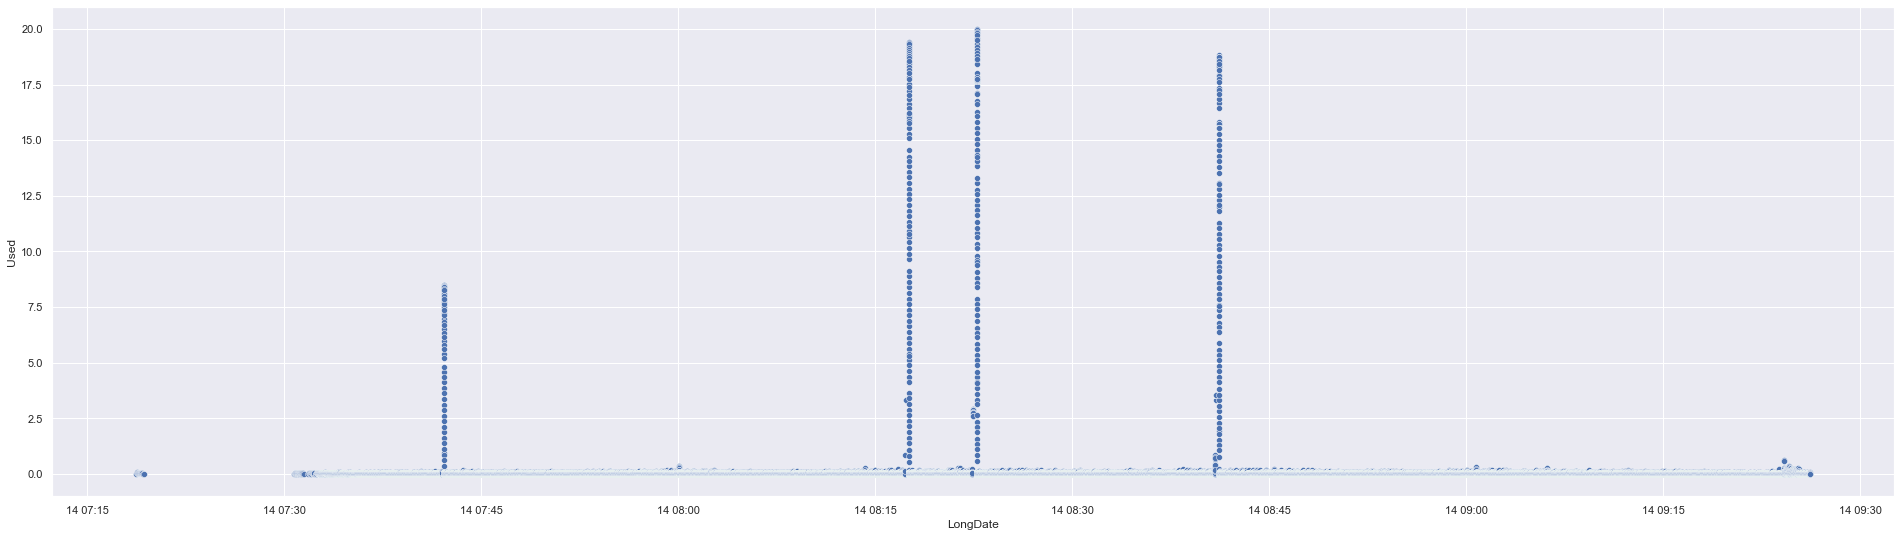

In [7]:
_ = sns.scatterplot(x=timer_data['LongDate'], y=timer_data['Used'])


In [8]:
mid_timer_data = timer_data[timer_data['LongDate'] > '2022-11-23 8:10']
mid_timer_data = mid_timer_data[timer_data['LongDate'] < '2022-11-23 8:15']
mid_timer_data.head()

,LongDate,Message,Used


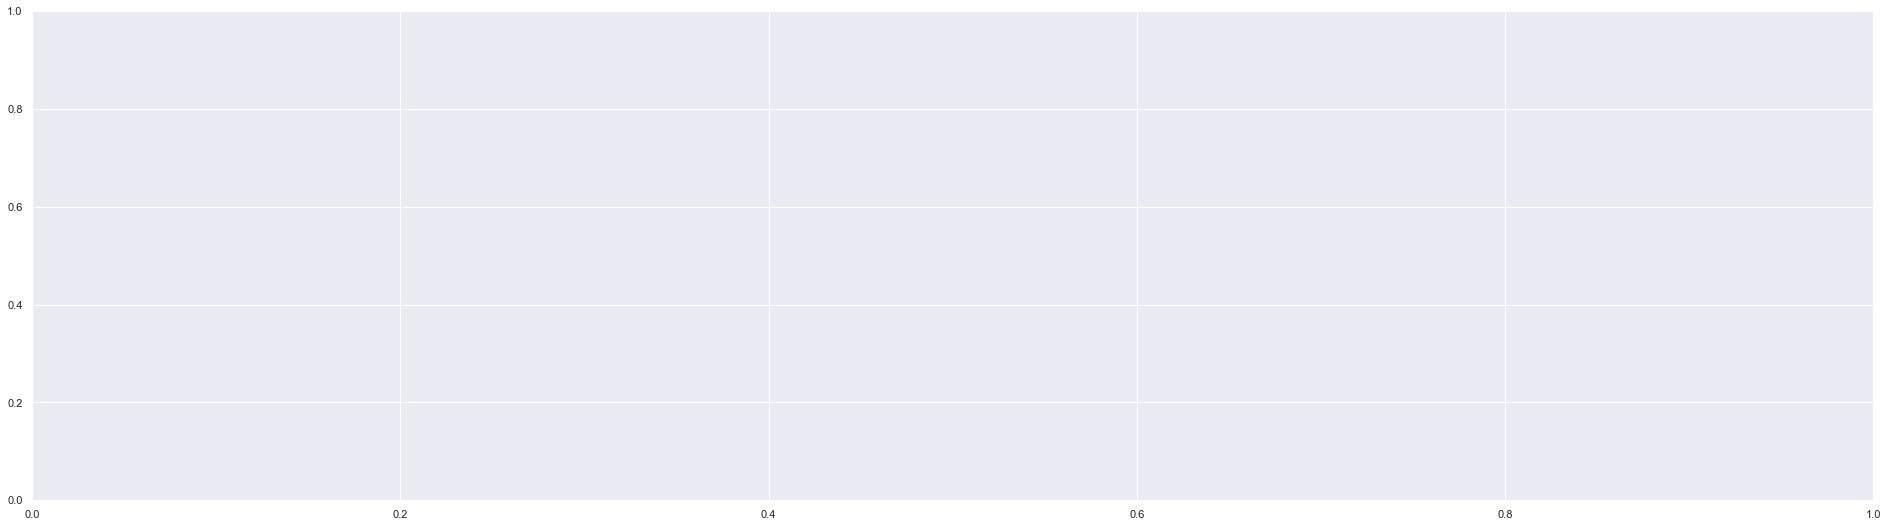

In [9]:
_ = sns.scatterplot(x=mid_timer_data['LongDate'], y=mid_timer_data['Used'])


- a cpu consumer

<!-- ![cpu](./cpu.png) -->

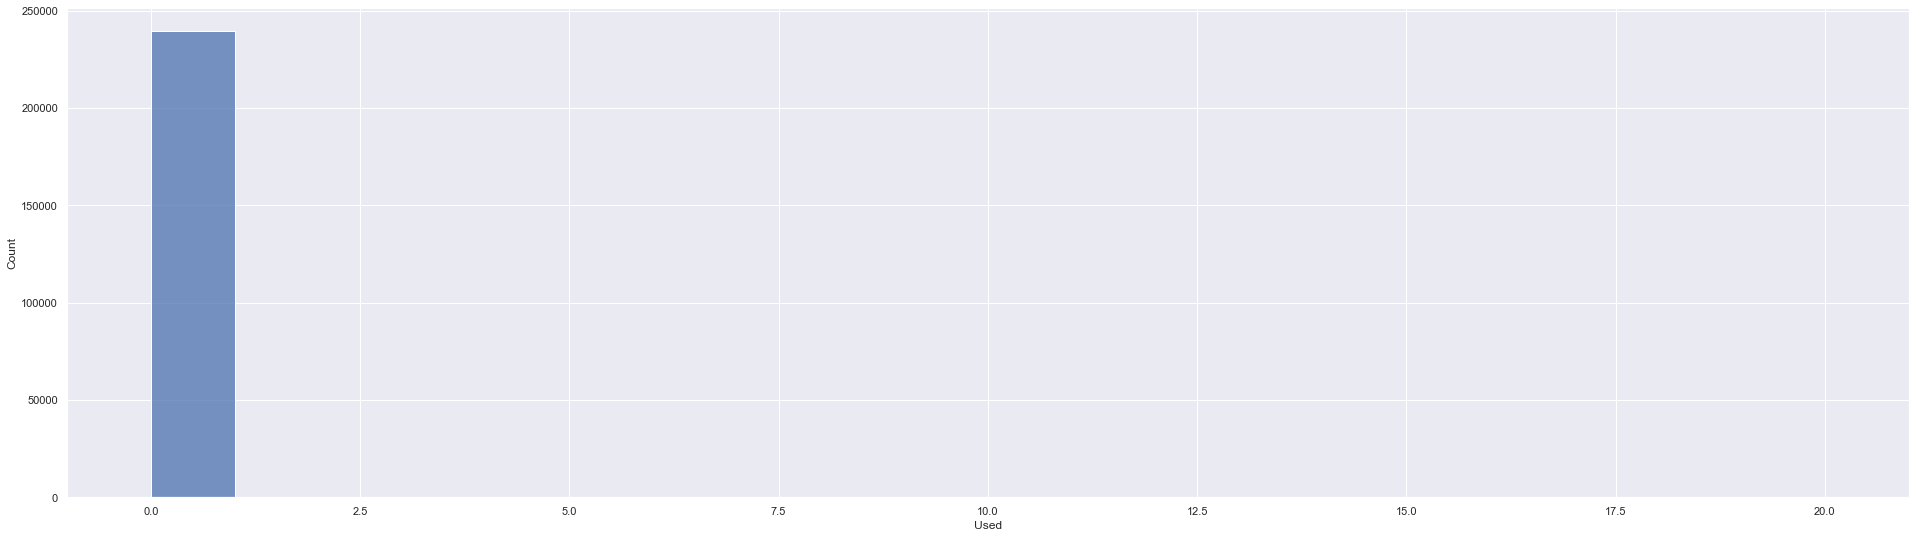

In [10]:
ax = sns.histplot(timer_data['Used'], binwidth=1)
# ax.axes[1,0]
plt.show()

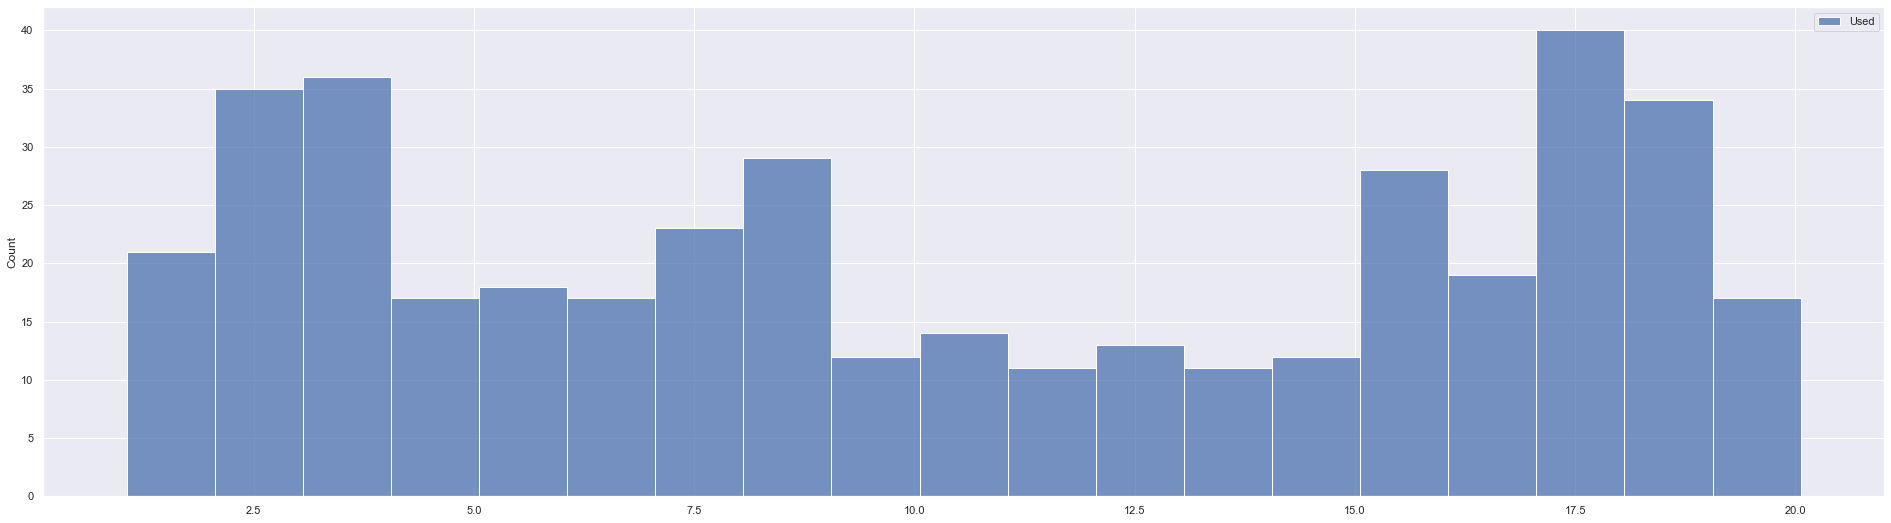

In [11]:
sns.histplot(timer_data[timer_data['Used'] > 1], binwidth=1)
plt.show()

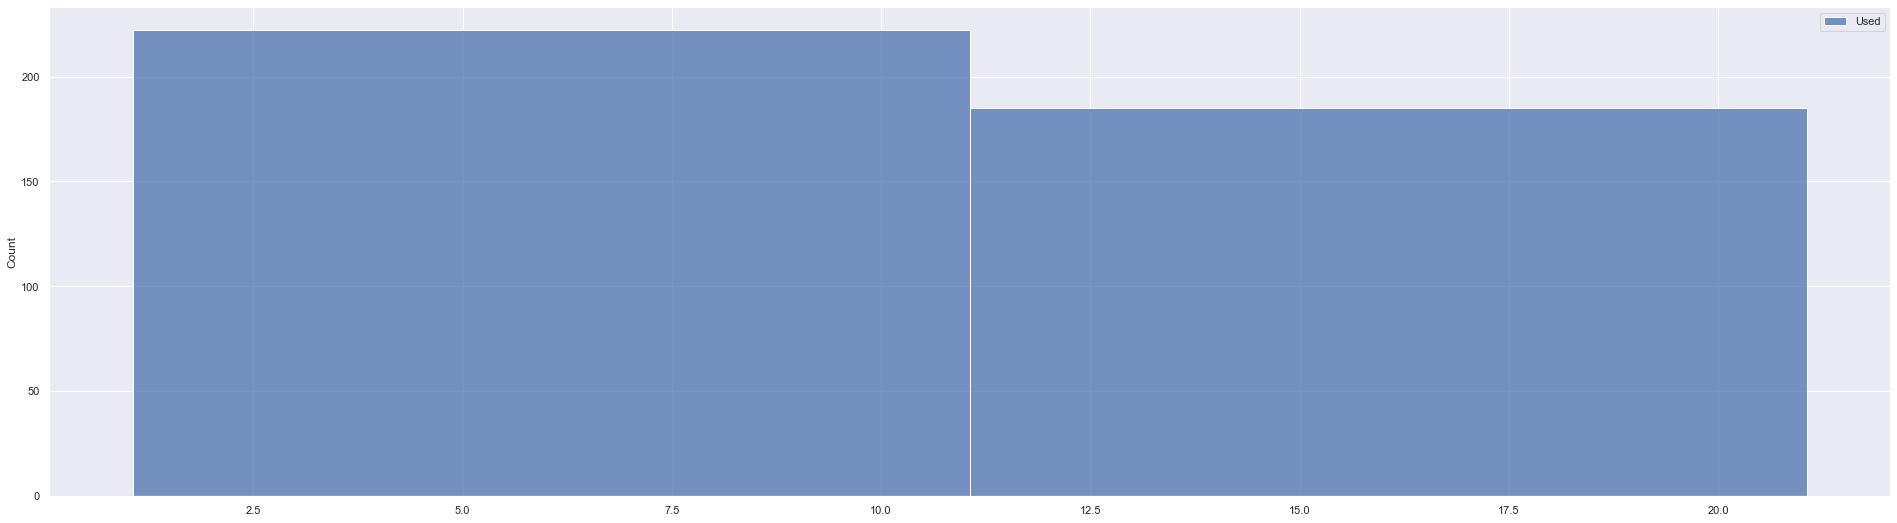

In [12]:
sns.histplot(timer_data[timer_data['Used'] > 1], binwidth=10)
plt.show()

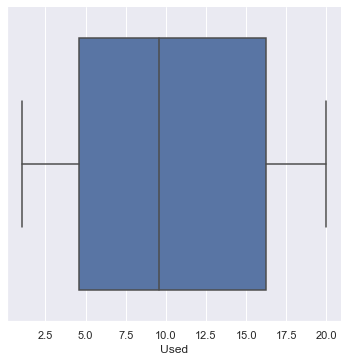

In [13]:
sns.catplot(kind='box',
           data=timer_data[timer_data['Used'] > 1],
           x='Used')

plt.show()

In [14]:
print('>1: ', (timer_data['Used'] > 1).sum())
print('> 10: ', (timer_data['Used'] > 10).sum())
print('> 20: ', (timer_data['Used'] > 20).sum())

>1:  407
> 10:  199
> 20:  0
